# Introdução a machine learning  classificação III
___

#### Importando bibliotecas

In [171]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Importando dados

In [172]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

data = pd.read_csv(uri)
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


#### Traduzindo as variáveis

In [173]:
traducao = {
    'unfinished': 'nao_finalizado',
    'expected_hours': 'horas_esperadas',
    'price': 'preco',
}

data = data.rename(columns=traducao)
data.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


#### Deixando as variáveis mais claras - invertendo o valor de nao_finalizado

In [174]:
trocar = {
    0 : 1,
    1: 0
}

data['finalizado'] = data.nao_finalizado.map(trocar)
data.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

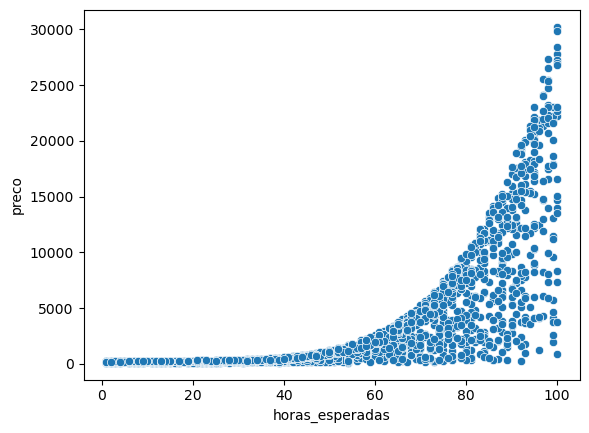

In [175]:
sns.scatterplot(x='horas_esperadas', y='preco', data=data)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

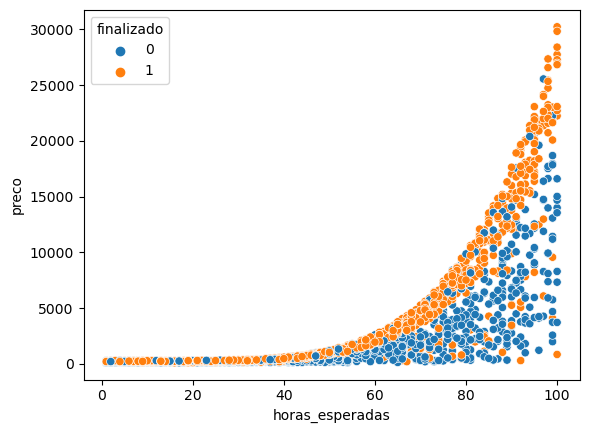

In [176]:
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado', data=data)

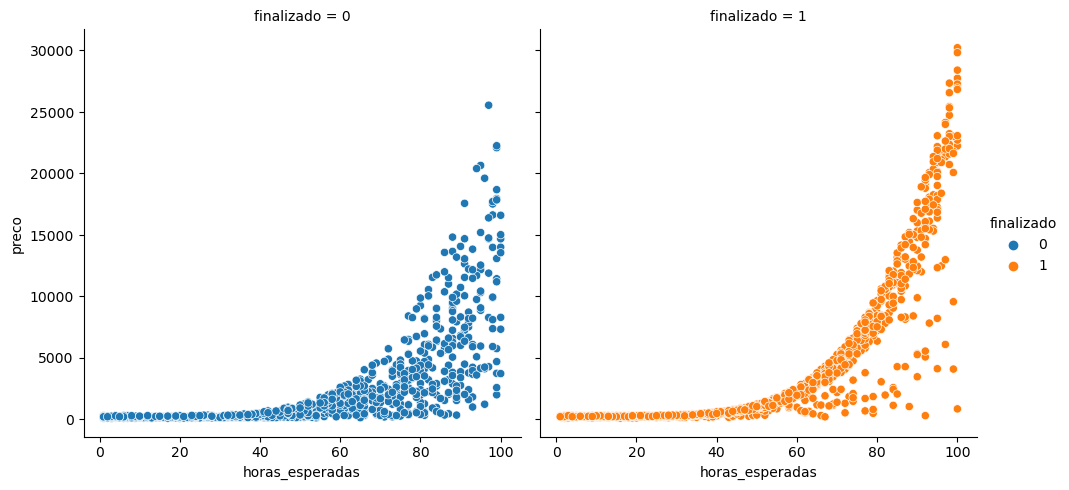

In [177]:
sns.relplot(x='horas_esperadas', y='preco', hue='finalizado', col='finalizado', data=data)

In [178]:
x = data[['horas_esperadas', 'preco']]
y = data['finalizado']

In [179]:
SEED = 5

In [180]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state = SEED, 
                                                        test_size = 0.25,
                                                        stratify = y
                                                        )

print(f'treinaremos com {len(treino_x)} e testaremos com {len(teste_x)} elementos')

treinaremos com 1617 e testaremos com 540 elementos


In [181]:
modelo = LinearSVC(random_state=SEED)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f'A acurácia foi: {(acuracia * 100).round(2)}%')

A acurácia foi: 54.07%


c:\Users\Ewerton\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [182]:
previsoes_de_base = np.ones(540)

In [183]:
acuracia = accuracy_score(teste_y, previsoes_de_base)
print(f'A acurácia do algorítmo de baseline foi: {(acuracia * 100).round(2)}%')

A acurácia do algorítmo de baseline foi: 52.59%


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

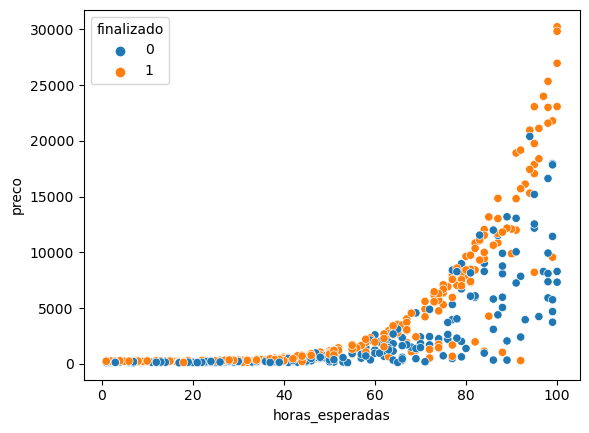

In [184]:
sns.scatterplot(x='horas_esperadas', y='preco', hue=teste_y, data=teste_x)

In [185]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 100 30223


In [186]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)



In [187]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [188]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
z

c:\Users\Ewerton\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

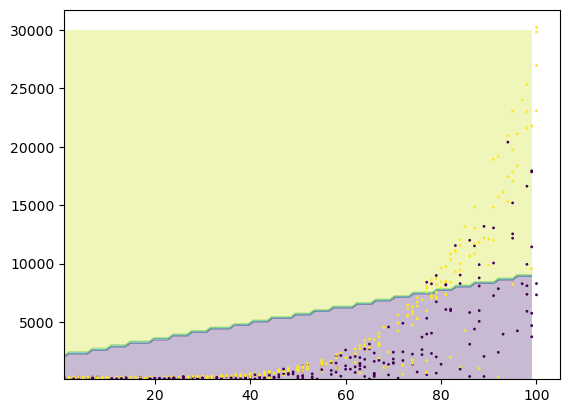

In [189]:
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)
# decision boundary

In [190]:
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 1617 elementos e testaremos com 540 elementos


In [191]:
acuracia = accuracy_score(teste_y, previsoes_de_base)
print(f'A acurácia do algorítmo de baseline foi: {(acuracia * 100).round(2)}%')

A acurácia do algorítmo de baseline foi: 52.59%


In [192]:
modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

c:\Users\Ewerton\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


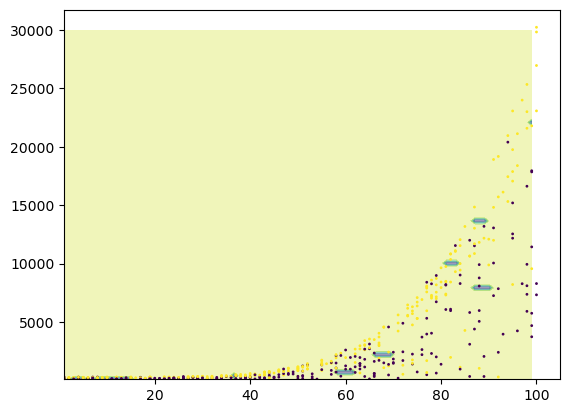

In [193]:
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

In [194]:
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

data_x = teste_x[:, 0]
data_y = teste_x[:, 1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

acuracia = accuracy_score(teste_y, previsoes_de_base)
print(f'A acurácia do algorítmo de baseline foi: {(acuracia * 100).round(2)}%')

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia do algorítmo de baseline foi: 52.59%


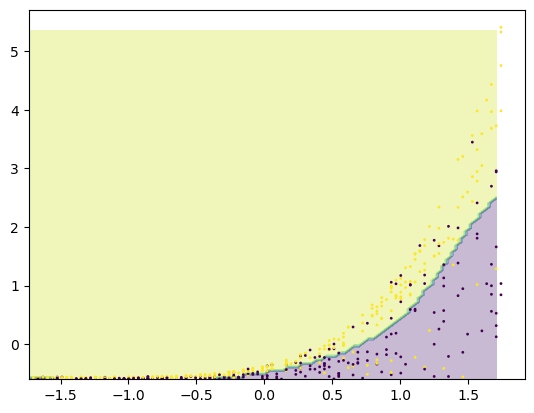

In [196]:
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)